<p align="center">
    <img src="smarkio.png">
</p>

Smarkio – Desafio Prático Ciência de Dados

Mauricio Eloy


# Datasets

1. Primeira aba - Análise_ML:

    a. pred_class - A classe que foi identificada pelo modelo;

    b. probabilidade - A probabilidade da classe que o modelo identificou;

    c. status - status da classificação de acordo com um especialista (approved);

    d. true_class - A classe verdadeira (se nula, assumir o pred_class);

    Obs: Se pred_class é igual a true_class, temos que o modelo acertou.

2. Segunda aba - NLP:

    a. letra - trecho de música;

    b. artista - cantora referente a letra.


# Bibliotecas

In [35]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import (LinearRegression, 
                                  LogisticRegression, 
                                  SGDClassifier, 
                                  RidgeClassifier)
from sklearn.naive_bayes import (GaussianNB, MultinomialNB)
from sklearn.neighbors import (KNeighborsClassifier)
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, 
                              GradientBoostingClassifier,
                             BaggingClassifier,
                             ExtraTreesClassifier,
                             AdaBoostClassifier,
                             VotingClassifier)
from sklearn.model_selection import GridSearchCV
# from sklearn import (ensemble)
from sklearn.multiclass import (OneVsRestClassifier)
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.feature_extraction.text import (CountVectorizer,
                                             HashingVectorizer,
                                             TfidfTransformer,
                                             TfidfVectorizer)
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    auc,
    confusion_matrix,
    roc_auc_score,
    roc_curve)
from sklearn.neural_network import MLPClassifier

# import lightgbm as lgb
from mlxtend.classifier import (StackingClassifier)
import xgboost

from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

from yellowbrick.classifier import (ConfusionMatrix, ROCAUC)
from yellowbrick.model_selection import (LearningCurve)

import pickle

# Dataset "Análise_ML"

## Importação dos Dados

In [36]:
df_analise_ml = pd.read_excel('teste_smarkio_lbs.xls', sheet_name = "Análise_ML")

In [37]:
df_analise_ml.head()

,Pred_class,probabilidade,status,True_class
0,2,0.079892,approved,0.0
1,2,0.379377,approved,74.0
2,2,0.379377,approved,74.0
3,2,0.420930,approved,74.0
4,2,0.607437,approved,NaN


In [38]:
df_analise_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643 entries, 0 to 642
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pred_class     643 non-null    int64  
 1   probabilidade  643 non-null    float64
 2   status         643 non-null    object 
 3   True_class     181 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 20.2+ KB


In [39]:
# pdpf.ProfileReport(df_analise_ml)

# Dataset "NLP"

## Preditor de Classes

### Dados

In [46]:
new_df = pd.read_excel('teste_smarkio_lbs.xls', sheet_name="NLP")
new_df.sample(20)

,letra,artista
322,Desperado Sitting in an old Monte Carlo A man ...,Rihanna
115,Verse 1: It's really been weighing on me Tell ...,Beyoncé
365,"Rihanna, Rupee uh Warning, warning! The hurric...",Rihanna
229,[B] Yo where the brother by my side at? [M] Yo...,Beyoncé
495,I've been ignoring this big lump in my throat ...,Rihanna
407,"Ecstasy....in the air I don't care, can't tell...",Rihanna
419,"[Intro: Young Jeezy] Say, Rih-Rih, let's take ...",Rihanna
262,What's Going On (All Stars Tribute) P Diddy: W...,Beyoncé
170,[Intro: Beyoncé] Who wants that perfect love s...,Beyoncé
489,Yellow diamonds in the light And we're standin...,Rihanna


In [47]:
new_df['target'] = new_df['artista'].map({'Rihanna' : 0,'Beyoncé' : 1})
y = new_df.target
new_df.sample(20)

,letra,artista,target
200,"I lay alone, awake at night Sorrow fills my ey...",Beyoncé,1
353,You saw me on a television Setting fire to all...,Rihanna,0
337,You say you love me but they feel like words t...,Rihanna,0
107,"I fought for you The hardest, it made me the s...",Beyoncé,1
446,I want your sex-u-al-ity I see you What you wa...,Rihanna,0
465,"Te Amo, Te Amo She says to me, I hear the pain...",Rihanna,0
135,I've been wanting to explain to you What it is...,Beyoncé,1
89,"What happened at the New Orleans? Bitch, I'm b...",Beyoncé,1
225,My body is magnified In the sun set me a light...,Beyoncé,1
496,"[Rihanna] Ooh na na, what's my name Ooh na na,...",Rihanna,0


In [48]:
def vetorizador_transform(X, metodo, max_features, max_df):
    vetorizar = metodo(max_features=max_features,max_df=max_df)
    X_df = pd.DataFrame.sparse.from_spmatrix(vetorizar.fit_transform(X), 
                                                    columns=vetorizar.get_feature_names())
    return X_df

In [49]:
#modelos a serem utilizados no modo default
models = [LogisticRegression,
         SGDClassifier,
         RidgeClassifier,
#          DecisionTreeClassifier,
         KNeighborsClassifier,
         MultinomialNB,
         SVC,
         RandomForestClassifier,
         GradientBoostingClassifier,
         BaggingClassifier,
         ExtraTreesClassifier,
         AdaBoostClassifier,
         xgboost.XGBClassifier,
         MLPClassifier]

#metricas iniciais
scores = ['accuracy','precision','recall','f1']

In [50]:
colunas_scoring = ['model','AUC']

for i in range(len(scores)):
        colunas_scoring.extend(['avg_'+scores[i],'std_'+scores[i]])
        
colunas_scoring

['model',
 'AUC',
 'avg_accuracy',
 'std_accuracy',
 'avg_precision',
 'std_precision',
 'avg_recall',
 'std_recall',
 'avg_f1',
 'std_f1']

In [51]:
def best_scores(df_scoring,score):
    print("Máximo ===", score)
    best_score = df_scoring['avg_'+score].max()
    return display(df_scoring[df_scoring['avg_'+score]==best_score])

In [52]:
def comparar_modelos_mod(lista_modelos, X, X_train,X_test, y, y_train, y_test, lista_scores):

    scoring = pd.DataFrame(columns=colunas_scoring)
    scoring['model'] = lista_modelos
    models_names = []
    lista_auc = []

    cont_models = 0
    for model in lista_modelos:  
        models_names.append(model.__name__) 
        cls = model()
        kfold = model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        
        cont_scores = 0
        for score in lista_scores:
            s = model_selection.cross_val_score(cls, X, y, scoring=score, cv=kfold)       
            scoring['avg_' + scores[cont_scores]][cont_models] = s.mean()
            scoring['std_' + scores[cont_scores]][cont_models] = s.std()
            cont_scores += 1

        print('====='+ model.__name__+' default'+'=====')
        cls.fit(X_train, y_train)
        y_predicted = cls.predict(X_test)
        roc_auc = roc_auc_score(y_test,y_predicted)
        lista_auc.append(roc_auc)
        print(classification_report(y_test,
                                   y_predicted,
                                   target_names=["Rihanna", "Beyoncé"]))
        fpr, tpr, thresold = roc_curve(y_test, y_predicted)
        
        plt.plot(fpr, tpr, lw = 1)
        plt.plot([0,1],[0,1], '--', color=(0.6, 0.6, 0.6), label="sorte")
        plt.xlim([-0.05,1.05])
        plt.ylim([-0.05,1.05])
        plt.xlabel("Taxa de positivos falsos", fontsize=15)
        plt.ylabel("Taxa de positivos verdadeiros", fontsize=15)
        plt.title("Curva ROC", fontsize=12)        
        plt.show(True)
        
        mapping = {0: "Rihanna", 1: "Beyoncé"}
        fig, ax = plt.subplots(figsize=(6, 6))
        cm_viz = ConfusionMatrix(cls, classes=["Rihanna", "Beyoncé"], label_encoder=mapping)
        cm_viz.score(X_test, y_test)
        cm_viz.poof()

        cont_models += 1

    scoring['model'] = models_names
    scoring['AUC'] = lista_auc
        
    for i in range(len(scores)):
        best_scores(scoring,scores[i])
    
    print("====Resumo de Métricas (cross_val_score)====")    
    return scoring

### Para a Vetorização CountVectorizer

In [53]:
X_mod = vetorizador_transform(new_df.letra,CountVectorizer, 100, 0.85)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_mod,
                                                                    y,
                                                                    test_size = 0.3,
                                                                    stratify=y,
                                                                    random_state = 123)

=====LogisticRegression default=====
              precision    recall  f1-score   support

     Rihanna       0.61      0.62      0.61        73
     Beyoncé       0.66      0.65      0.65        83

    accuracy                           0.63       156
   macro avg       0.63      0.63      0.63       156
weighted avg       0.63      0.63      0.63       156



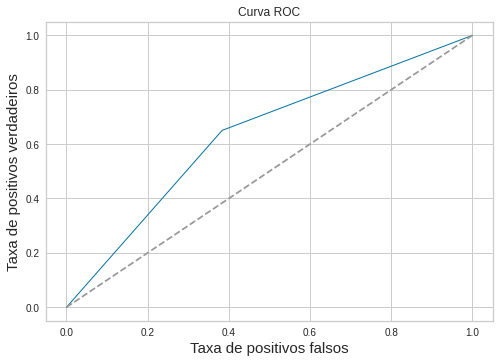

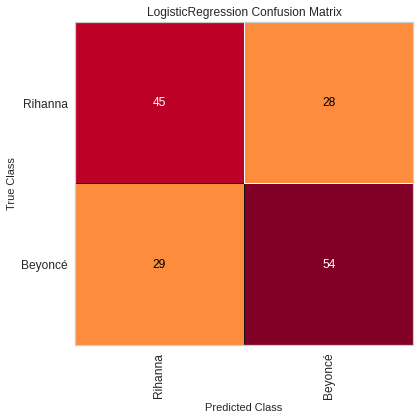

=====SGDClassifier default=====
              precision    recall  f1-score   support

     Rihanna       0.55      0.68      0.61        73
     Beyoncé       0.65      0.51      0.57        83

    accuracy                           0.59       156
   macro avg       0.60      0.60      0.59       156
weighted avg       0.60      0.59      0.59       156



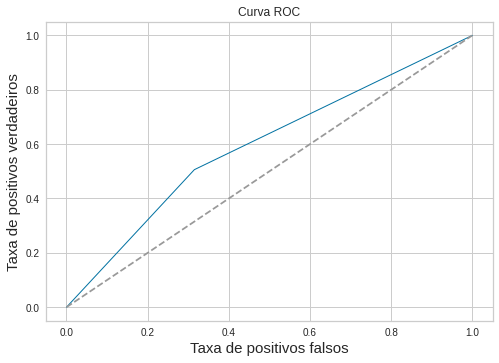

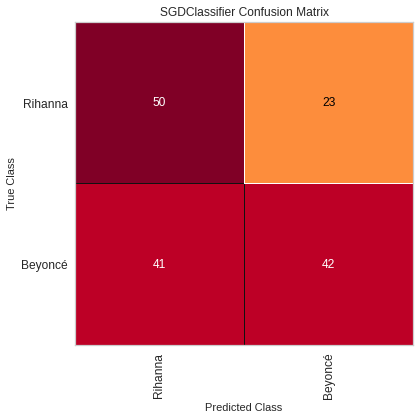

=====RidgeClassifier default=====
              precision    recall  f1-score   support

     Rihanna       0.61      0.53      0.57        73
     Beyoncé       0.63      0.70      0.66        83

    accuracy                           0.62       156
   macro avg       0.62      0.62      0.62       156
weighted avg       0.62      0.62      0.62       156



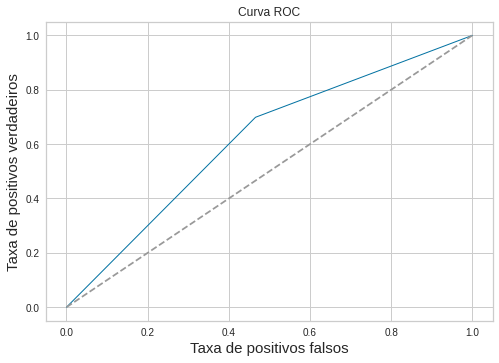

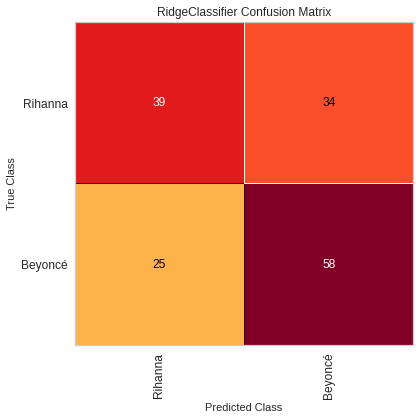

=====KNeighborsClassifier default=====
              precision    recall  f1-score   support

     Rihanna       0.53      0.37      0.44        73
     Beyoncé       0.56      0.71      0.63        83

    accuracy                           0.55       156
   macro avg       0.55      0.54      0.53       156
weighted avg       0.55      0.55      0.54       156



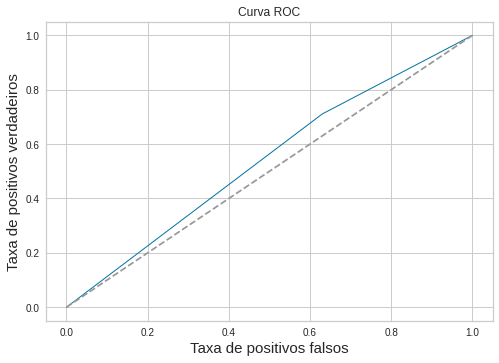

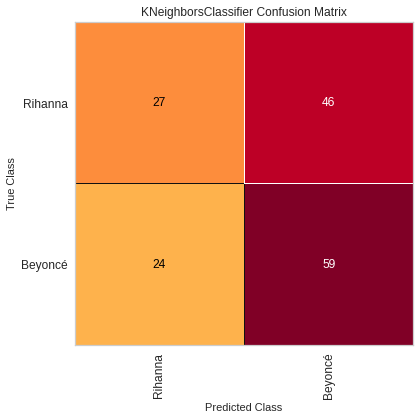

=====MultinomialNB default=====
              precision    recall  f1-score   support

     Rihanna       0.60      0.49      0.54        73
     Beyoncé       0.61      0.71      0.66        83

    accuracy                           0.61       156
   macro avg       0.61      0.60      0.60       156
weighted avg       0.61      0.61      0.60       156



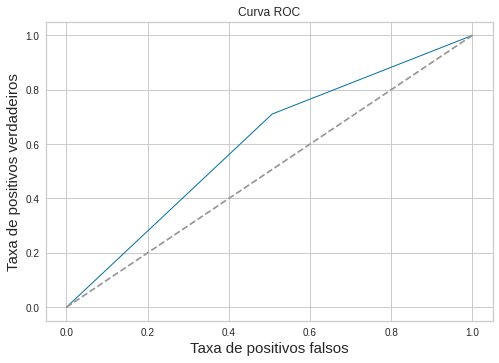

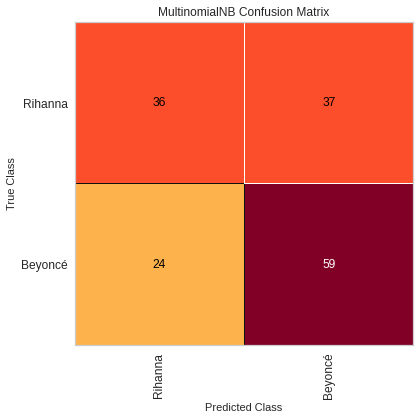

=====SVC default=====
              precision    recall  f1-score   support

     Rihanna       0.59      0.33      0.42        73
     Beyoncé       0.57      0.80      0.67        83

    accuracy                           0.58       156
   macro avg       0.58      0.56      0.54       156
weighted avg       0.58      0.58      0.55       156



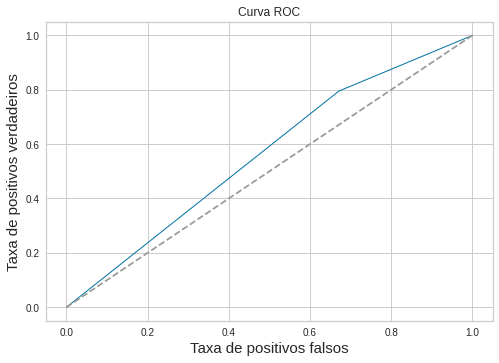

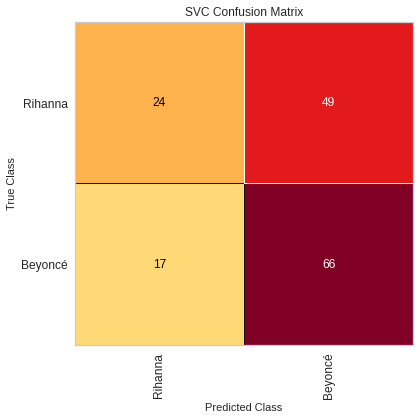

=====RandomForestClassifier default=====
              precision    recall  f1-score   support

     Rihanna       0.64      0.60      0.62        73
     Beyoncé       0.67      0.70      0.68        83

    accuracy                           0.65       156
   macro avg       0.65      0.65      0.65       156
weighted avg       0.65      0.65      0.65       156



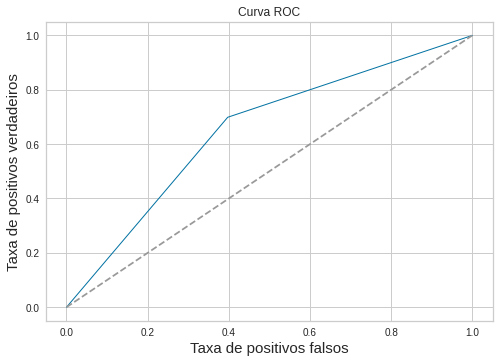

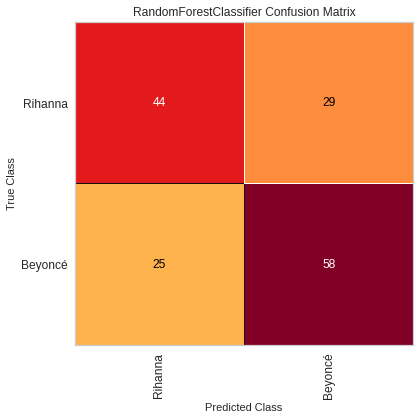

=====GradientBoostingClassifier default=====
              precision    recall  f1-score   support

     Rihanna       0.63      0.59      0.61        73
     Beyoncé       0.66      0.70      0.68        83

    accuracy                           0.65       156
   macro avg       0.65      0.64      0.64       156
weighted avg       0.65      0.65      0.65       156



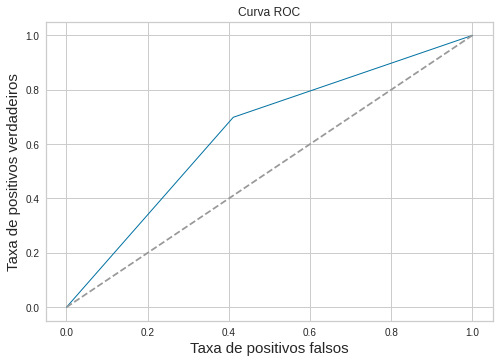

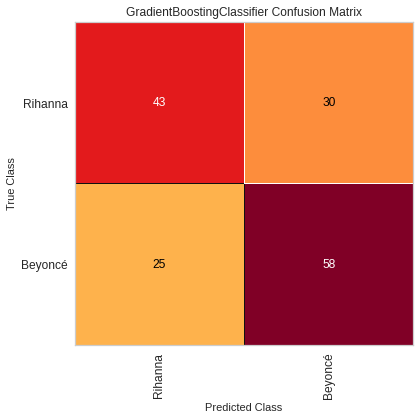

=====BaggingClassifier default=====
              precision    recall  f1-score   support

     Rihanna       0.57      0.79      0.66        73
     Beyoncé       0.72      0.47      0.57        83

    accuracy                           0.62       156
   macro avg       0.65      0.63      0.62       156
weighted avg       0.65      0.62      0.61       156



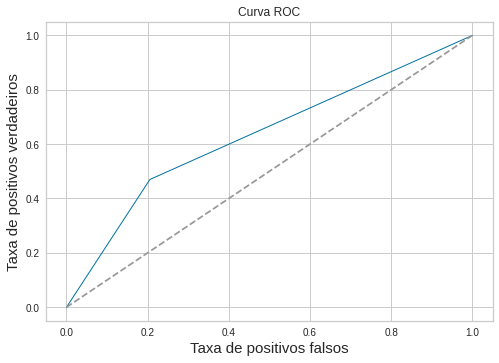

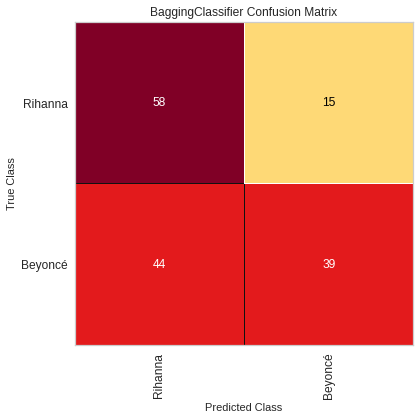

=====ExtraTreesClassifier default=====
              precision    recall  f1-score   support

     Rihanna       0.62      0.56      0.59        73
     Beyoncé       0.64      0.70      0.67        83

    accuracy                           0.63       156
   macro avg       0.63      0.63      0.63       156
weighted avg       0.63      0.63      0.63       156



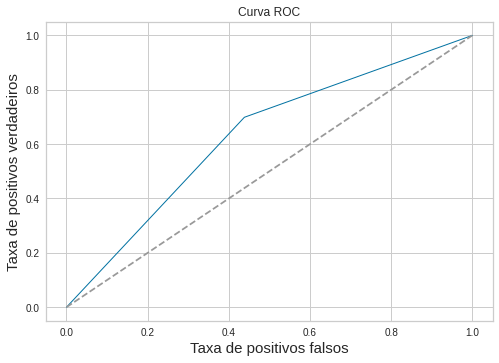

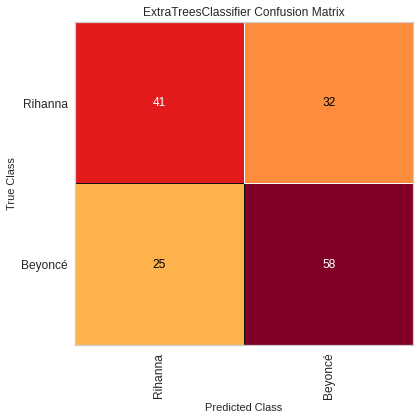

=====AdaBoostClassifier default=====
              precision    recall  f1-score   support

     Rihanna       0.62      0.62      0.62        73
     Beyoncé       0.66      0.66      0.66        83

    accuracy                           0.64       156
   macro avg       0.64      0.64      0.64       156
weighted avg       0.64      0.64      0.64       156



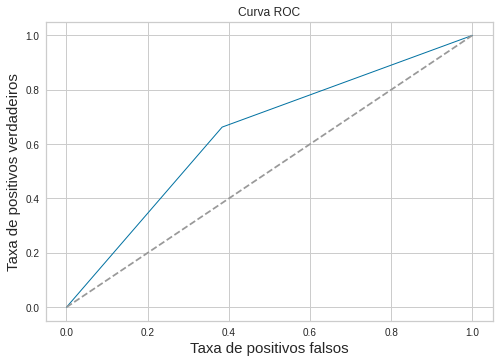

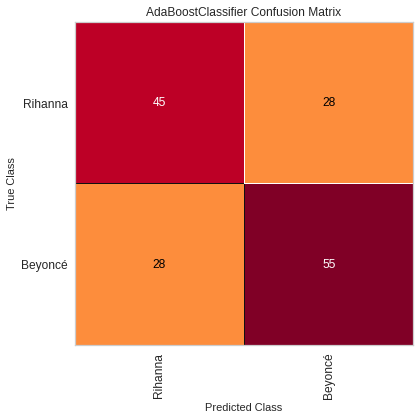

=====XGBClassifier default=====
              precision    recall  f1-score   support

     Rihanna       0.66      0.64      0.65        73
     Beyoncé       0.69      0.71      0.70        83

    accuracy                           0.68       156
   macro avg       0.68      0.68      0.68       156
weighted avg       0.68      0.68      0.68       156



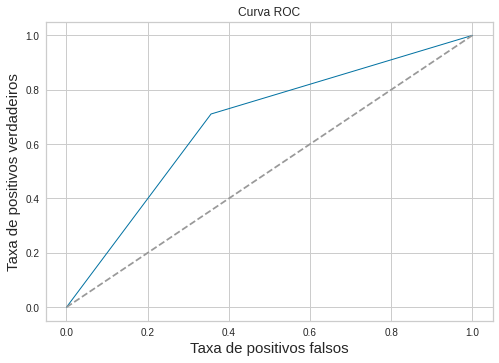

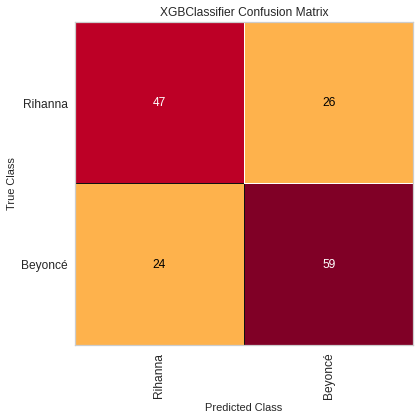

=====MLPClassifier default=====
              precision    recall  f1-score   support

     Rihanna       0.64      0.63      0.63        73
     Beyoncé       0.68      0.69      0.68        83

    accuracy                           0.66       156
   macro avg       0.66      0.66      0.66       156
weighted avg       0.66      0.66      0.66       156



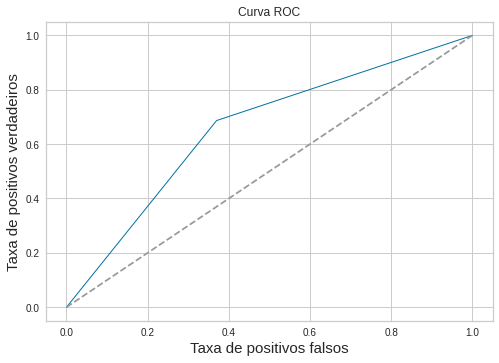

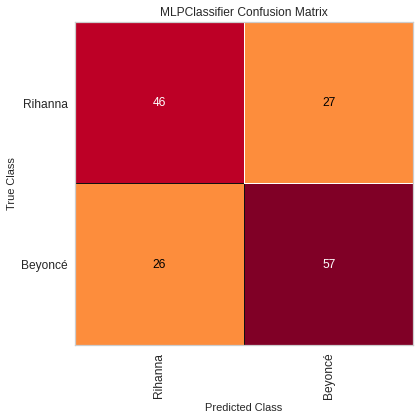

Máximo === accuracy


,model,AUC,avg_accuracy,std_accuracy,avg_precision,std_precision,avg_recall,std_recall,avg_f1,std_f1
12,MLPClassifier,0.658442,0.664059,0.0414886,0.662307,0.0382832,0.675286,0.0195884,0.685915,0.036012


Máximo === precision


,model,AUC,avg_accuracy,std_accuracy,avg_precision,std_precision,avg_recall,std_recall,avg_f1,std_f1
12,MLPClassifier,0.658442,0.664059,0.0414886,0.662307,0.0382832,0.675286,0.0195884,0.685915,0.036012


Máximo === recall


,model,AUC,avg_accuracy,std_accuracy,avg_precision,std_precision,avg_recall,std_recall,avg_f1,std_f1
5,SVC,0.561974,0.619754,0.0282208,0.611938,0.0207762,0.770168,0.0491793,0.681382,0.026874


Máximo === f1


,model,AUC,avg_accuracy,std_accuracy,avg_precision,std_precision,avg_recall,std_recall,avg_f1,std_f1
12,MLPClassifier,0.658442,0.664059,0.0414886,0.662307,0.0382832,0.675286,0.0195884,0.685915,0.036012


====Resumo de Métricas (cross_val_score)====


,model,AUC,avg_accuracy,std_accuracy,avg_precision,std_precision,avg_recall,std_recall,avg_f1,std_f1
0,LogisticRegression,0.633520,0.61966,0.0275132,0.637294,0.0284285,0.660673,0.0432344,0.647371,0.0217683
1,SGDClassifier,0.595478,0.615926,0.0312967,0.634887,0.0881468,0.653401,0.0816443,0.609308,0.0672514
2,RidgeClassifier,0.616521,0.604145,0.0318661,0.617278,0.0314233,0.67165,0.0242372,0.642558,0.0186582
3,KNeighborsClassifier,0.540353,0.600317,0.0292029,0.598654,0.021896,0.740673,0.0403638,0.661918,0.0277827
4,MultinomialNB,0.601997,0.555937,0.0574081,0.571499,0.0486254,0.638788,0.0918817,0.601328,0.0622199
5,SVC,0.561974,0.619754,0.0282208,0.611938,0.0207762,0.770168,0.0491793,0.681382,0.026874
6,RandomForestClassifier,0.650767,0.637005,0.0376029,0.65186,0.0244076,0.693266,0.0588862,0.669006,0.0420453
7,GradientBoostingClassifier,0.643918,0.625299,0.0568922,0.629168,0.0542944,0.711313,0.0532981,0.659458,0.0374605
8,BaggingClassifier,0.632200,0.613816,0.017969,0.653682,0.0373046,0.540067,0.042838,0.595129,0.0400314
9,ExtraTreesClassifier,0.630220,0.644642,0.0511124,0.623257,0.0448076,0.689899,0.0406156,0.64743,0.0379066


In [54]:
# comparar_modelos(models, X_mod, X_train, y, y_train, scores)
comparar_modelos_mod(models, X_mod, X_train,X_test, y, y_train, y_test, scores)

### Para a Vetorização TfidfVectorizer

In [55]:
X_mod = vetorizador_transform(new_df.letra,TfidfVectorizer, 100, 0.85)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_mod,
                                                                    y,
                                                                    test_size = 0.3,
                                                                    stratify=y,
                                                                    random_state = 123)

=====LogisticRegression default=====
              precision    recall  f1-score   support

     Rihanna       0.61      0.53      0.57        73
     Beyoncé       0.63      0.70      0.66        83

    accuracy                           0.62       156
   macro avg       0.62      0.62      0.62       156
weighted avg       0.62      0.62      0.62       156



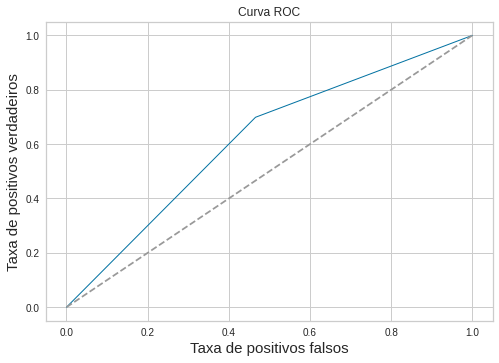

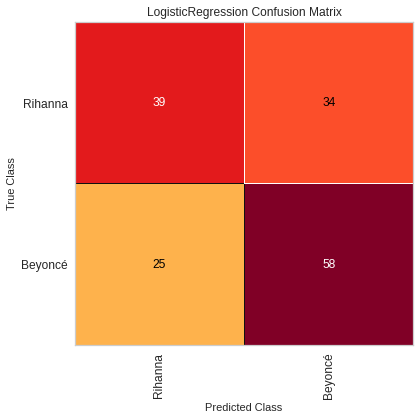

=====SGDClassifier default=====
              precision    recall  f1-score   support

     Rihanna       0.63      0.51      0.56        73
     Beyoncé       0.63      0.73      0.68        83

    accuracy                           0.63       156
   macro avg       0.63      0.62      0.62       156
weighted avg       0.63      0.63      0.62       156



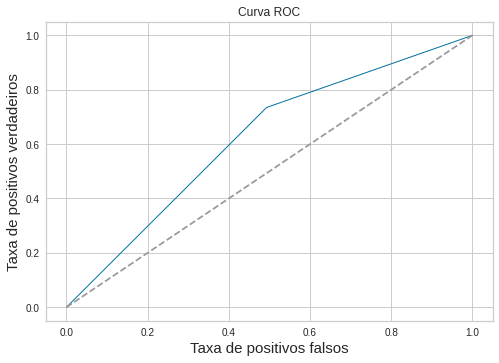

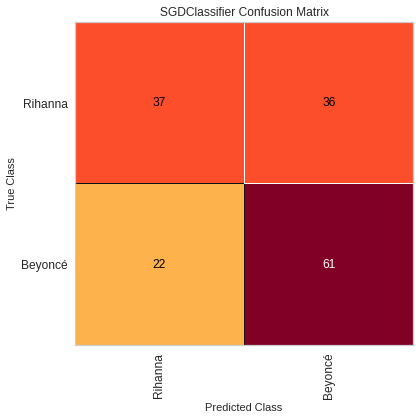

=====RidgeClassifier default=====
              precision    recall  f1-score   support

     Rihanna       0.58      0.56      0.57        73
     Beyoncé       0.62      0.64      0.63        83

    accuracy                           0.60       156
   macro avg       0.60      0.60      0.60       156
weighted avg       0.60      0.60      0.60       156



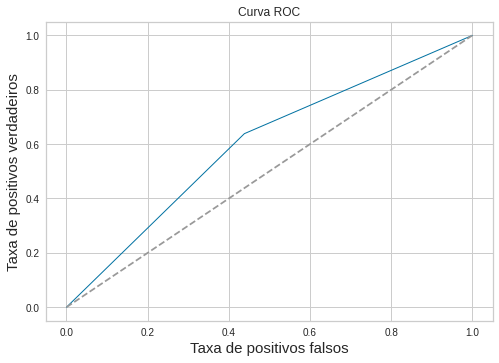

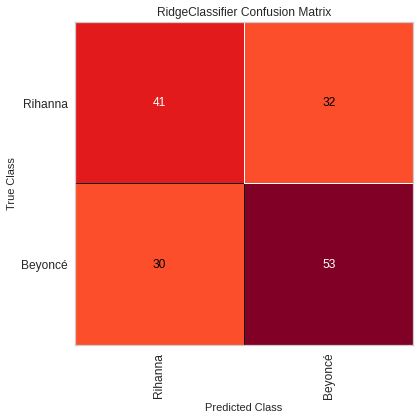

=====KNeighborsClassifier default=====
              precision    recall  f1-score   support

     Rihanna       0.61      0.47      0.53        73
     Beyoncé       0.61      0.73      0.67        83

    accuracy                           0.61       156
   macro avg       0.61      0.60      0.60       156
weighted avg       0.61      0.61      0.60       156



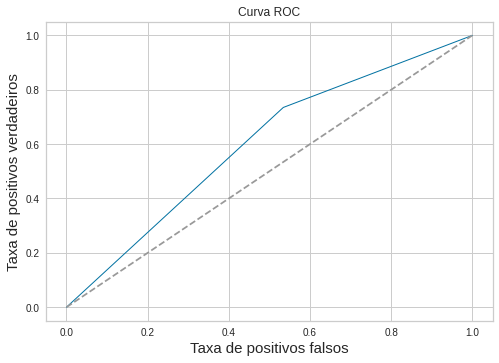

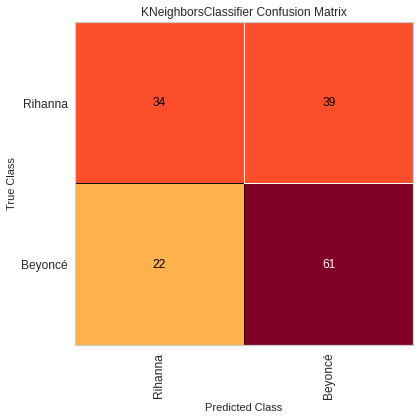

=====MultinomialNB default=====
              precision    recall  f1-score   support

     Rihanna       0.63      0.37      0.47        73
     Beyoncé       0.59      0.81      0.68        83

    accuracy                           0.60       156
   macro avg       0.61      0.59      0.57       156
weighted avg       0.61      0.60      0.58       156



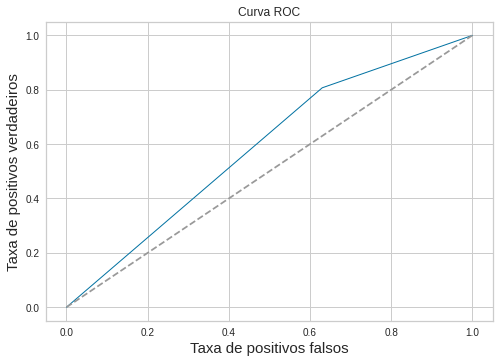

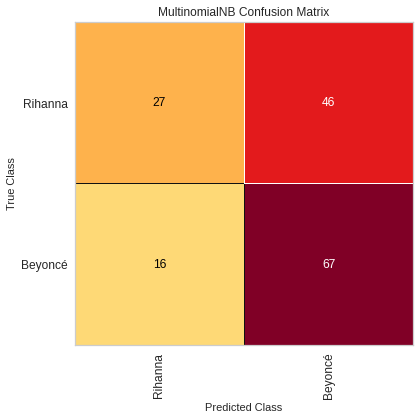

=====SVC default=====
              precision    recall  f1-score   support

     Rihanna       0.65      0.60      0.62        73
     Beyoncé       0.67      0.71      0.69        83

    accuracy                           0.66       156
   macro avg       0.66      0.66      0.66       156
weighted avg       0.66      0.66      0.66       156



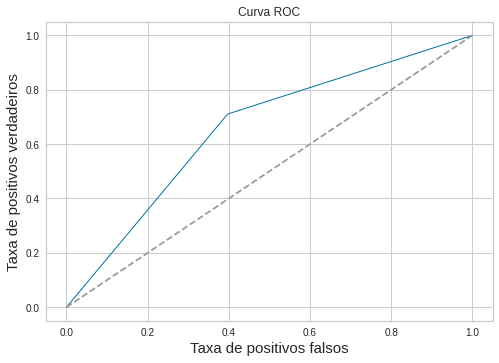

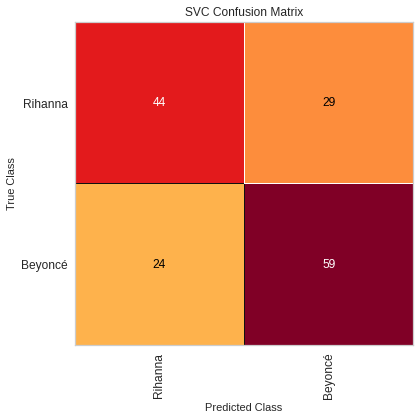

=====RandomForestClassifier default=====
              precision    recall  f1-score   support

     Rihanna       0.61      0.55      0.58        73
     Beyoncé       0.63      0.69      0.66        83

    accuracy                           0.62       156
   macro avg       0.62      0.62      0.62       156
weighted avg       0.62      0.62      0.62       156



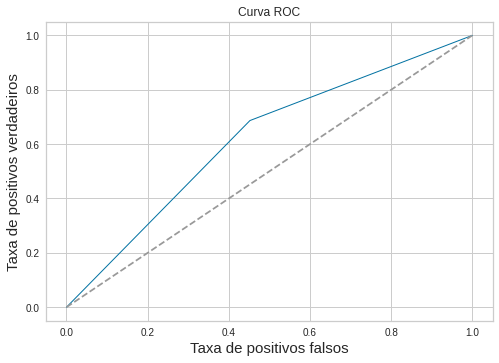

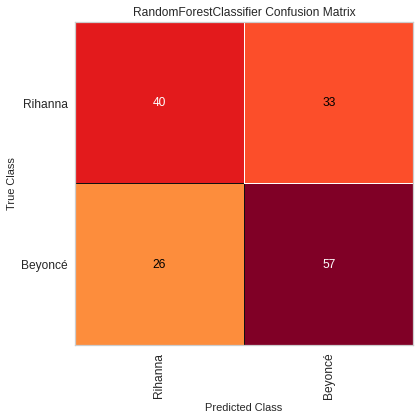

=====GradientBoostingClassifier default=====
              precision    recall  f1-score   support

     Rihanna       0.65      0.67      0.66        73
     Beyoncé       0.70      0.69      0.70        83

    accuracy                           0.68       156
   macro avg       0.68      0.68      0.68       156
weighted avg       0.68      0.68      0.68       156



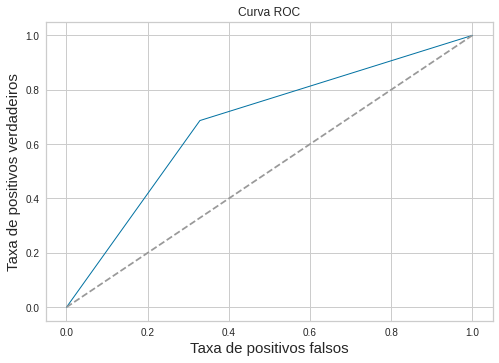

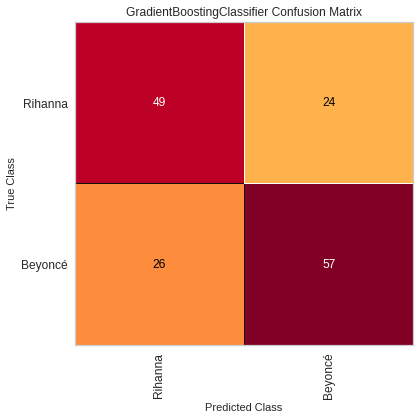

=====BaggingClassifier default=====
              precision    recall  f1-score   support

     Rihanna       0.57      0.68      0.62        73
     Beyoncé       0.66      0.54      0.60        83

    accuracy                           0.61       156
   macro avg       0.61      0.61      0.61       156
weighted avg       0.62      0.61      0.61       156



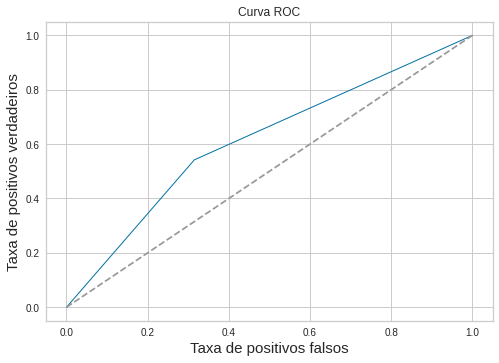

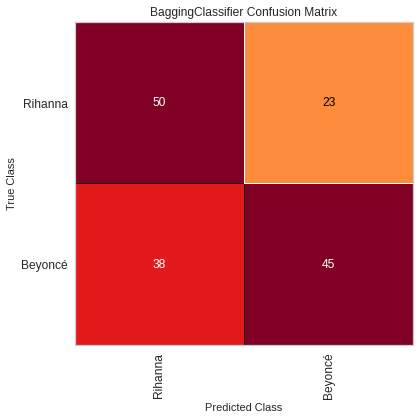

=====ExtraTreesClassifier default=====
              precision    recall  f1-score   support

     Rihanna       0.71      0.58      0.64        73
     Beyoncé       0.68      0.80      0.73        83

    accuracy                           0.69       156
   macro avg       0.70      0.69      0.68       156
weighted avg       0.70      0.69      0.69       156



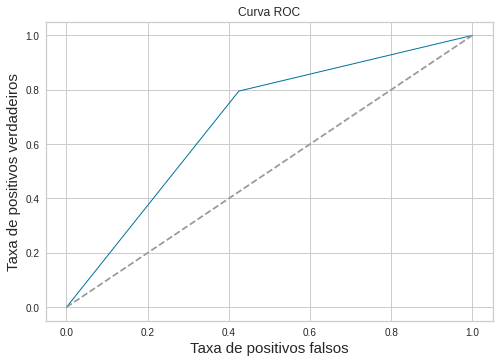

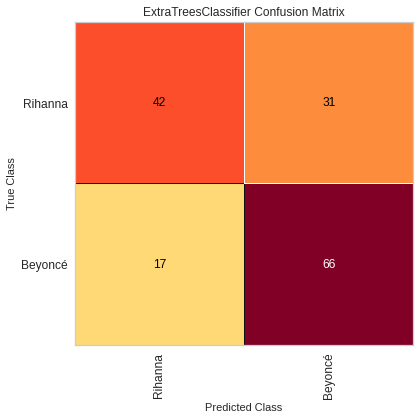

=====AdaBoostClassifier default=====
              precision    recall  f1-score   support

     Rihanna       0.61      0.59      0.60        73
     Beyoncé       0.65      0.67      0.66        83

    accuracy                           0.63       156
   macro avg       0.63      0.63      0.63       156
weighted avg       0.63      0.63      0.63       156



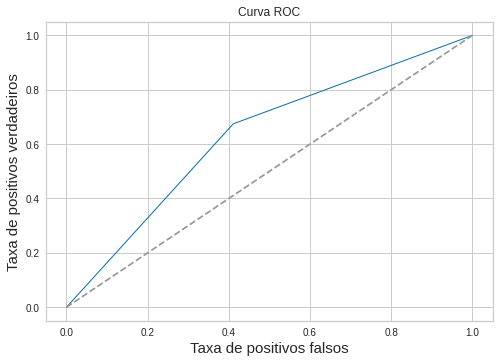

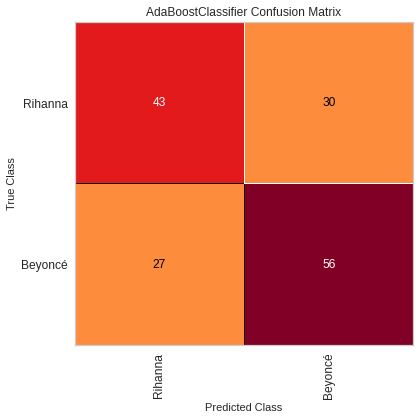

=====XGBClassifier default=====
              precision    recall  f1-score   support

     Rihanna       0.67      0.62      0.64        73
     Beyoncé       0.69      0.73      0.71        83

    accuracy                           0.68       156
   macro avg       0.68      0.68      0.68       156
weighted avg       0.68      0.68      0.68       156



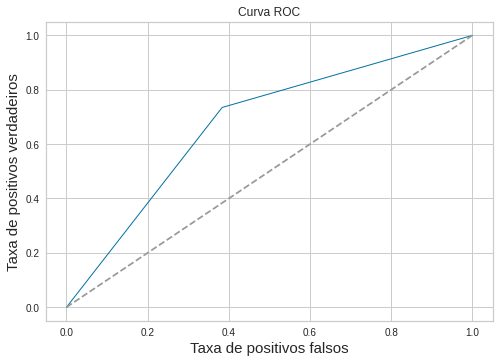

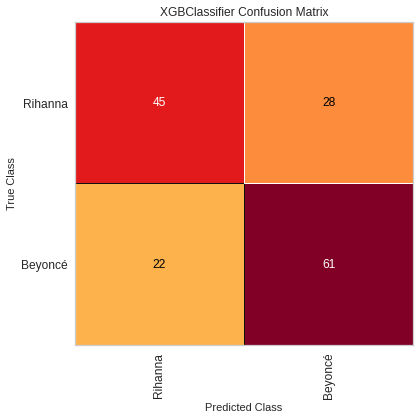

=====MLPClassifier default=====
              precision    recall  f1-score   support

     Rihanna       0.63      0.64      0.64        73
     Beyoncé       0.68      0.66      0.67        83

    accuracy                           0.65       156
   macro avg       0.65      0.65      0.65       156
weighted avg       0.65      0.65      0.65       156



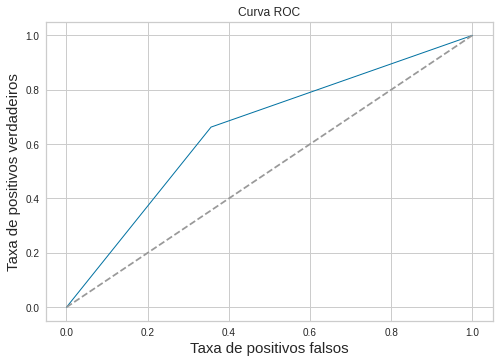

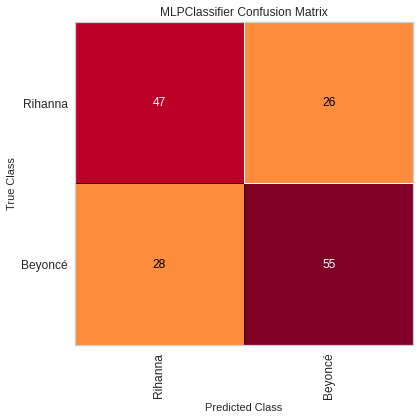

Máximo === accuracy


,model,AUC,avg_accuracy,std_accuracy,avg_precision,std_precision,avg_recall,std_recall,avg_f1,std_f1
11,XGBClassifier,0.675689,0.652446,0.0404375,0.657171,0.0371832,0.718788,0.0507935,0.685973,0.0386953


Máximo === precision


,model,AUC,avg_accuracy,std_accuracy,avg_precision,std_precision,avg_recall,std_recall,avg_f1,std_f1
11,XGBClassifier,0.675689,0.652446,0.0404375,0.657171,0.0371832,0.718788,0.0507935,0.685973,0.0386953


Máximo === recall


,model,AUC,avg_accuracy,std_accuracy,avg_precision,std_precision,avg_recall,std_recall,avg_f1,std_f1
4,MultinomialNB,0.588546,0.579108,0.0377308,0.578812,0.0351496,0.770168,0.0419219,0.65962,0.0232094


Máximo === f1


,model,AUC,avg_accuracy,std_accuracy,avg_precision,std_precision,avg_recall,std_recall,avg_f1,std_f1
11,XGBClassifier,0.675689,0.652446,0.0404375,0.657171,0.0371832,0.718788,0.0507935,0.685973,0.0386953


====Resumo de Métricas (cross_val_score)====


,model,AUC,avg_accuracy,std_accuracy,avg_precision,std_precision,avg_recall,std_recall,avg_f1,std_f1
0,LogisticRegression,0.616521,0.602315,0.0603587,0.616402,0.0569058,0.664579,0.0870628,0.637264,0.0606479
1,SGDClassifier,0.620895,0.609951,0.0393316,0.615393,0.0315536,0.617441,0.10475,0.584915,0.0872586
2,RidgeClassifier,0.600099,0.610007,0.0427202,0.628253,0.0421873,0.649966,0.0690706,0.637026,0.0444293
3,KNeighborsClassifier,0.600347,0.613891,0.0455767,0.608611,0.0350785,0.755623,0.0691174,0.673379,0.0453849
4,MultinomialNB,0.588546,0.579108,0.0377308,0.578812,0.0351496,0.770168,0.0419219,0.65962,0.0232094
5,SVC,0.656792,0.635157,0.0355716,0.640566,0.03381,0.715623,0.067718,0.67385,0.0348921
6,RandomForestClassifier,0.617346,0.62149,0.0395193,0.618968,0.00934308,0.748215,0.0385362,0.676197,0.043177
7,GradientBoostingClassifier,0.678990,0.623413,0.0333061,0.637765,0.0345688,0.671313,0.0477281,0.654296,0.03065
8,BaggingClassifier,0.613550,0.607879,0.0715541,0.621872,0.0496642,0.583973,0.0476079,0.58421,0.0684105
9,ExtraTreesClassifier,0.685262,0.608028,0.0245628,0.624189,0.0301256,0.697306,0.0456454,0.680442,0.0277779


In [56]:
# comparar_modelos(models, X_mod, X_train, y, y_train, scores)
comparar_modelos_mod(models, X_mod, X_train,X_test, y, y_train, y_test, scores)

## Tuning dos melhores modelos

* XGBClassifier
* ExtraTreesClassifier
* RandomForestClassifier
* GradientBoostingClassifier
* MLPClassifier

### XGBClassifier

In [ ]:
# xgb_cls = xgboost.XGBClassifier()
# params = {
#     "max_features": [0.4, "auto"],
#     "min_samples_leaf": [1, 0.1],
#     "random_state": [42],
#     'n_estimators': [50, 100, 150, 200],
#     'learning_rate': [0.01, 0.1, 0.2, 0.3],
#     'max_depth': range(3, 10),
#     'colsample_bytree': [i/10.0 for i in range(1, 3)],
#     'gamma': [i/10.0 for i in range(3)],
#     'k': [10]
# }
# cv = model_selection.GridSearchCV(xgb_cls, params, n_jobs=-1).fit(X_train, y_train)
# print(cv.best_params_)

In [ ]:
# xgb_cls_best = xgboost.XGBClassifier(
#     **{'colsample_bytree': 0.2, 
#        'gamma': 0.2, 
#        'k': 10, 
#        'learning_rate': 0.3, 
#        'max_depth': 4, 
#        'max_features': 0.4, 
#        'min_samples_leaf': 1, 
#        'n_estimators': 200, 
#        'random_state': 42}
# )
# xgb_cls_best.fit(X_train, y_train)
# xgb_cls_best.score(X_test, y_test)

### ExtraTreesClassifier


In [ ]:
# ext_cls = ensemble.ExtraTreesClassifier()
# params = {
#     "max_features": [0.4, "auto"],
#     "min_samples_leaf": [1, 0.1],
#     "random_state": [42],
#     'n_estimators': [50, 100, 150, 200],
#     'max_depth': range(3, 10),
# }
# cv = model_selection.GridSearchCV(ext_cls, params, n_jobs=-1).fit(X_train, y_train)
# print(cv.best_params_)

In [ ]:
# ext_cls_best = ensemble.ExtraTreesClassifier(
#     **{'max_depth': 6, 
#        'max_features': 'auto', 
#        'min_samples_leaf': 1, 
#        'n_estimators': 50, 
#        'random_state': 42}
# )
# ext_cls_best.fit(X_train, y_train)
# ext_cls_best.score(X_test, y_test)

### RandomForestClassifier


In [ ]:
# rf_cls = ensemble.RandomForestClassifier()
# params = {
#     "max_features": [0.4, "auto"],
#     "n_estimators": [15, 200],
#     "min_samples_leaf": [1, 0.1],
#     "random_state": [42],
# }
# cv = model_selection.GridSearchCV(rf_cls, params, n_jobs=-1).fit(X_train, y_train)
# print(cv.best_params_)

In [ ]:
# rf_cls_best = ensemble.RandomForestClassifier(
#     **{
#         "max_features": "auto",
#         "min_samples_leaf": 1,
#         "n_estimators": 200,
#         "random_state": 42,
#     }
# )
# rf_cls_best.fit(X_train, y_train)
# rf_cls_best.score(X_test, y_test)

### GradientBoostingClassifier


In [ ]:
# gb_cls = ensemble.GradientBoostingClassifier()
# params = {
#     "max_features": [0.4, "auto"],
#     "min_samples_leaf": [1, 0.1],
#     "random_state": [42],
#     'n_estimators': [50, 100, 150, 200],
#     'max_depth': range(3, 10),
# }
# cv = model_selection.GridSearchCV(gb_cls, params, n_jobs=-1).fit(X_train, y_train)
# print(cv.best_params_)

In [ ]:
# gb_cls_best = ensemble.GradientBoostingClassifier(
#     **{'max_depth': 7, 
#        'max_features': 0.4, 
#        'min_samples_leaf': 0.1, 
#        'n_estimators': 200, 
#        'random_state': 42}
# )
# gb_cls_best.fit(X_train, y_train)
# gb_cls_best.score(X_test, y_test)

## Preditor Multlabel

### Importação dos dados

In [6]:
df_nlp = pd.read_excel('teste_smarkio_lbs.xls', sheet_name="NLP")

In [7]:
df_nlp.head()

,letra,artista
0,Jay-z Uh-uh-uh You ready b? Let's go get 'em. ...,Beyoncé
1,Your challengers are a young group from Housto...,Beyoncé
2,"Dum-da-de-da Do, do, do, do, do, do (Coming do...",Beyoncé
3,If I ain't got nothing I got you If I ain't go...,Beyoncé
4,Six inch heels She walked in the club like nob...,Beyoncé


In [8]:
df_nlp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   letra    518 non-null    object
 1   artista  518 non-null    object
dtypes: object(2)
memory usage: 8.2+ KB


In [9]:
df_nlp.artista.unique()

array(['Beyoncé', 'Rihanna'], dtype=object)

In [10]:
df_nlp.artista.value_counts()

Beyoncé    274
Rihanna    244
Name: artista, dtype: int64

In [11]:
lista_de_artistas = list(df_nlp.artista.unique())
lista_de_artistas

['Beyoncé', 'Rihanna']

In [12]:
def nova_coluna(lista_artistas, dataframe, nome_artista):
    for artista in lista_artistas:
        coluna = []
        for linha_artista in dataframe[nome_artista]:
            if artista in linha_artista:
                coluna.append(1)
            else:
                coluna.append(0)
        dataframe[artista] = coluna

In [13]:
nova_coluna(lista_de_artistas,df_nlp,"artista")
df_nlp.sample(20)

,letra,artista,Beyoncé,Rihanna
213,All the single ladies All the single ladies Al...,Beyoncé,1,0
113,"I been on, I been on, I been on Tell me who go...",Beyoncé,1,0
63,I tried to change Closed my mouth more Tried t...,Beyoncé,1,0
17,At last my love has come along My lonely days ...,Beyoncé,1,0
461,Sweet home Alabama Where the skies are so blue...,Rihanna,0,1
51,(Missy) I was in love That's what it was when ...,Beyoncé,1,0
242,"Baby, baby, baby What's it gonna be? Baby, bab...",Beyoncé,1,0
183,Looking for a job in the city Working for the ...,Beyoncé,1,0
269,Your love is bright as ever Even in the shadow...,Beyoncé,1,0
33,"If you feel insignificant, you better think ag...",Beyoncé,1,0


In [14]:
lista_zip_artistas = list(zip(df_nlp[lista_de_artistas[0]],
                     df_nlp[lista_de_artistas[1]]))

df_nlp["todos_artistas"] = lista_zip_artistas
df_nlp.sample(10)

,letra,artista,Beyoncé,Rihanna,todos_artistas
495,I've been ignoring this big lump in my throat ...,Rihanna,0,1,"(0, 1)"
240,"That's How You Like It, huh That's How You Lik...",Beyoncé,1,0,"(1, 0)"
151,Bring the beat in! Love on top On top On top ...,Beyoncé,1,0,"(1, 0)"
295,[Sean Paul] Break It Off Breakin it off And se...,Rihanna,0,1,"(0, 1)"
411,"I fly like paper, get high like planes If you ...",Rihanna,0,1,"(0, 1)"
375,Chorus: Just as long As it makes you happy If ...,Rihanna,0,1,"(0, 1)"
448,I've been looking for a driver who is qualifie...,Rihanna,0,1,"(0, 1)"
364,You know you thrill me seconds of everyday Bit...,Rihanna,0,1,"(0, 1)"
497,"I've been everywhere, man Looking for someone ...",Rihanna,0,1,"(0, 1)"
287,[Rick Ross] Rick Rozay Rihanna Rich forever St...,Rihanna,0,1,"(0, 1)"


In [15]:
from sklearn import model_selection

letra_treino, letra_test, artista_treino, artista_teste = model_selection.train_test_split(
    df_nlp.letra,
    df_nlp.todos_artistas,
    test_size = 0.3,
    stratify=df_nlp.artista,
    random_state = 123)

In [16]:
tamanhos = [len(df_nlp.letra[i]) for i in range(len(df_nlp.letra))]
tamanhos.sort()
tamanhos[-1]

6677

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

vetorizar = TfidfVectorizer(max_features=4000, max_df=0.85, stop_words='english')
vetorizar

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.85, max_features=4000,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [18]:
vetorizar.fit(df_nlp.letra)
letras_treino_tfidf = vetorizar.transform(letra_treino)
letras_test_tfidf = vetorizar.transform(letra_test)
print(letras_treino_tfidf.shape)
print(letras_test_tfidf.shape)

(362, 4000)
(156, 4000)


In [19]:
print(vetorizar.get_feature_names())

['10', '11', '16', '20', '22', '2x', '3rd', '3x', '40', '45', '4x', '50', '5792', '5car', '60', '632', '808', '97', '9x', 'aa', 'aaaaaah', 'aaah', 'aah', 'abit', 'able', 'absolutely', 'abstained', 'acabo', 'acaso', 'accept', 'acceptin', 'account', 'act', 'acted', 'actin', 'acting', 'action', 'activité', 'actress', 'actually', 'ad', 'addicted', 'addiction', 'addictive', 'adiós', 'admire', 'admit', 'adoration', 'adore', 'adorent', 'advantage', 'advice', 'advise', 'affair', 'affect', 'affectin', 'affection', 'affliction', 'afford', 'afraid', 'afros', 'afternoon', 'age', 'ago', 'ah', 'aham', 'ahead', 'ahh', 'ahora', 'ahuh', 'aim', 'aimes', 'aiming', 'ain', 'aint', 'air', 'airplanes', 'akon', 'al', 'alabama', 'alarm', 'alarmed', 'albino', 'album', 'alcohol', 'alejandro', 'ali', 'alicia', 'alight', 'alive', 'alley', 'alligators', 'allow', 'allowed', 'alma', 'almighty', 'alot', 'alright', 'altercation', 'altered', 'amanda', 'amar', 'amarte', 'amazing', 'ambition', 'amen', 'amendment', 'americ

In [20]:
import numpy as np

artista_treino_array = np.asarray(list(artista_treino))
artista_test_array = np.asarray(list(artista_teste))

In [21]:
artista_treino_array

array([[0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1,

In [22]:
regressao_logistica = LogisticRegression(solver = 'lbfgs')
classificador_onevsrest = OneVsRestClassifier(regressao_logistica)
classificador_onevsrest.fit(letras_treino_tfidf, artista_treino_array)
resultado_onevsrest = classificador_onevsrest.score(letras_test_tfidf, artista_test_array)
print("Resultado {0: .2f}%".format(resultado_onevsrest*100))

Resultado  69.87%
